## Module Imports

In [1]:
import importMat as im
import experimentList as el
import angleDataframeCreation as adc
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import spectrogram
from scipy.signal import hilbert, butter, filtfilt, firls, savgol_filter, lfilter
import scipy.stats as stats
import emd
import constants as const
import pandas as pd
import seaborn as sns
import plottingFunctions as pf
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels

Loading DLC 2.3.6...


## Recreate dataframe (if new data has been added): Do not touch unless recreating dataframe

In [2]:
df = adc.createDataFrame()

2024_05_23_E1 added to Dataframe.
2024_05_23_E2 added to Dataframe.
2024_05_23_E3 added to Dataframe.
2024_05_23_E4 added to Dataframe.
2024_05_23_E5 added to Dataframe.
2024_05_24_E1 added to Dataframe.
2024_05_24_E2 added to Dataframe.
2024_05_24_E3 added to Dataframe.
2024_05_24_E4 added to Dataframe.
2024_05_24_E5 added to Dataframe.
2024_05_28_E1 added to Dataframe.
2024_05_28_E2 added to Dataframe.
2024_05_28_E3 added to Dataframe.
2024_05_28_E4 added to Dataframe.
2024_05_28_E5 added to Dataframe.
2024_05_29_E1 added to Dataframe.
2024_05_29_E2 added to Dataframe.
2024_05_29_E3 added to Dataframe.
2024_05_29_E4 added to Dataframe.
2024_05_29_E5 added to Dataframe.
2024_06_13_E1 added to Dataframe.
2024_06_13_E2 added to Dataframe.
2024_06_14_E1 added to Dataframe.
2024_06_14_E2 added to Dataframe.
2024_06_14_E3 added to Dataframe.
2024_06_28_E1 added to Dataframe.
2024_06_28_E2 added to Dataframe.
2024_06_28_E3 added to Dataframe.
2024_06_28_E4 added to Dataframe.
2024_07_05_E1 

## Load dataframe and create conditional average subDataFrames

In [2]:
df = pf.loadDataFrame(cameraView='dorsal')
fl_df = df.reset_index()
#fl_df['wba'] = fl_df['wba'].apply(lambda x: x * -1)
for datatype in ['wbf', 'wba']:
    
    fl_df['Avg_'+datatype] = pd.Series(dtype='object')
    
    for i in fl_df.index:
        trace = fl_df[datatype][i]
        pufferSignal = fl_df[const.puffer_signal_name][i]
        flightBool = fl_df['flightBool'][i]
        avg = np.mean(trace[const.stimStart*const.fs:const.stimEnd*const.fs])
        if np.all(flightBool):
            fl_df['Avg_'+datatype][i] = avg 

lra_df = df.reset_index()
for datatype in ['L_antenna', 'R_antenna']:
    
    lra_df['Flight_'+datatype] = pd.Series(dtype='object')
    lra_df['NoFlight_'+datatype] = pd.Series(dtype='object')
    
    for i in fl_df.index:
        trace = lra_df[datatype][i]
        pufferSignal = lra_df[const.puffer_signal_name][i]
        flightBool = lra_df['flightBool'][i]
        avg = np.mean(trace[const.stimStart*const.fps:const.stimEnd*const.fps], axis=0)
        if np.all(flightBool):
            lra_df['Flight_'+datatype][i] = avg
            lra_df['NoFlight_'+datatype][i] = [np.nan, np.nan]
        elif np.all(flightBool == False):
            lra_df['Flight_'+datatype][i] = [np.nan, np.nan]
            lra_df['NoFlight_'+datatype][i] = avg
        else:
            lra_df['Flight_'+datatype][i] = [np.nan, np.nan]
            lra_df['NoFlight_'+datatype][i] = [np.nan, np.nan]

## Fig 5B

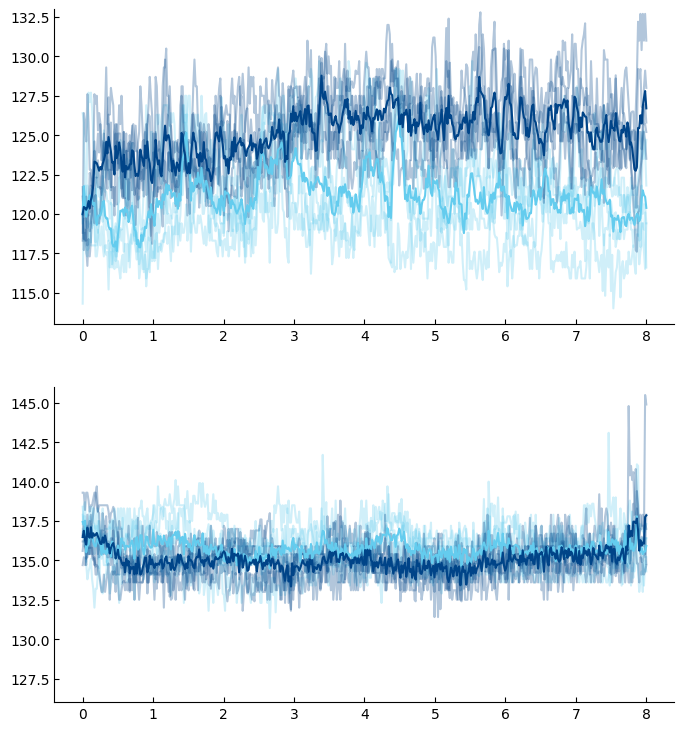

In [3]:
# 26 (no flight), 28 (flight)
vteal = np.array([0,153,136])/255
#vred = np.array([204,51,17])/255
vpink = np.array([238,51,119])/255
mclightblue = np.array([100,204,238])/255
mcdarkblue = np.array([0,68,136])/255
df_fly = df.loc[(df['fly'] == 5),['iaa','stimulus','flightBool']]
df_fly['iaa'] = [row[:,1] for row in df_fly['iaa']]
df_fly['stimulus'] = [row.item() for row in df_fly['stimulus']]
df_plot = df_fly[df_fly['stimulus'].isin([5,35])]
df_plot['flight'] = [np.all(row) for row in df_plot['flightBool']]
df_flight = df_plot[df_plot['flight'] == True]


df_fly = df.loc[(df['fly'] == 14),['iaa','stimulus','flightBool']]
df_fly['iaa'] = [row[:,1] for row in df_fly['iaa']]
df_fly['stimulus'] = [row.item() for row in df_fly['stimulus']]
df_plot = df_fly[df_fly['stimulus'].isin([5,35])]
df_plot['flight'] = [np.all(row) for row in df_plot['flightBool']]
df_noFlight = df_plot[df_plot['flight'] == False]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,9))

x = np.linspace(0,8,60*8)
[ax1.plot(x,row,c=mclightblue,alpha=0.3) for row in df_flight[df_flight['stimulus']==5]['iaa']]
[ax1.plot(x,row,c=mcdarkblue,alpha=0.3) for row in df_flight[df_flight['stimulus']==35]['iaa']]
#[ax1.plot(x,row,c=const.red,alpha=0.3) for row in df_flight[df_flight['stimulus']==50]['iaa']]
ax1.plot(x,np.nanmean(np.array(df_flight[df_flight['stimulus']==5]['iaa'].tolist()),axis=0),c=mclightblue,alpha=1,linewidth=1.5)
ax1.plot(x,np.nanmean(np.array(df_flight[df_flight['stimulus']==35]['iaa'].tolist()),axis=0),c=mcdarkblue,alpha=1,linewidth=1.5)
#ax1.plot(x,np.nanmean(np.array(df_flight[df_flight['stimulus']==50]['iaa'].tolist()),axis=0),c=const.red,alpha=1,linewidth=1.5)
ax1.set_ylim([113,133])
ax1.tick_params(direction='in')
ax1.spines[['right', 'top']].set_visible(False)

[ax2.plot(x,row,c=mclightblue,alpha=0.3) for row in df_noFlight[df_noFlight['stimulus']==5]['iaa']]
[ax2.plot(x,row,c=mcdarkblue,alpha=0.3) for row in df_noFlight[df_noFlight['stimulus']==35]['iaa']]
#[ax2.plot(x,row,c=const.red,alpha=0.3) for row in df_noFlight[df_noFlight['stimulus']==50]['iaa']]
ax2.plot(x,np.nanmean(np.array(df_noFlight[df_noFlight['stimulus']==5]['iaa'].tolist()),axis=0),c=mclightblue,alpha=1,linewidth=1.5)
ax2.plot(x,np.nanmean(np.array(df_noFlight[df_noFlight['stimulus']==35]['iaa'].tolist()),axis=0),c=mcdarkblue,alpha=1,linewidth=1.5)
#ax2.plot(x,np.nanmean(np.array(df_noFlight[df_noFlight['stimulus']==50]['iaa'].tolist()),axis=0),c=const.red,alpha=1,linewidth=1.5)
ax2.set_ylim([126,146])
ax2.tick_params(direction='in')
ax2.spines[['right', 'top']].set_visible(False)

fig.savefig('5B.pdf')

## N=flies and n=trials values

In [4]:
for stimulus in [0,5,10,15,20,25,30,35,40,45,50]:
    sub_df = df[df['stimulus'] == stimulus]
    flight_mask = [~np.isnan(item[0] + item[1]) for item in sub_df['StimAvg_Flight'].to_list()]
    flight_N = len(sub_df['fly'][flight_mask].unique())
    noFlight_mask = [~np.isnan(item[0] + item[1]) for item in sub_df['StimAvg_noFlight'].to_list()]
    noFlight_N = len(sub_df['fly'][noFlight_mask].unique())
    print('stimulus: ' + str(stimulus))
    print('flight: N=' + str(flight_N) + ' n=' + str(sum(flight_mask)))
    print('no flight: N=' + str(noFlight_N) + ' n=' + str(sum(noFlight_mask)))
    print()

stimulus: 0
flight: N=18 n=37
no flight: N=28 n=98

stimulus: 5
flight: N=20 n=48
no flight: N=26 n=98

stimulus: 10
flight: N=19 n=45
no flight: N=28 n=101

stimulus: 15
flight: N=17 n=43
no flight: N=28 n=101

stimulus: 20
flight: N=21 n=54
no flight: N=28 n=91

stimulus: 25
flight: N=21 n=50
no flight: N=27 n=98

stimulus: 30
flight: N=17 n=40
no flight: N=27 n=106

stimulus: 35
flight: N=22 n=59
no flight: N=26 n=88

stimulus: 40
flight: N=19 n=49
no flight: N=27 n=95

stimulus: 45
flight: N=20 n=48
no flight: N=29 n=100

stimulus: 50
flight: N=22 n=55
no flight: N=28 n=91



## Fig 5D, including variants

TtestResult(statistic=nan, pvalue=nan, df=17)
TtestResult(statistic=-2.475302981320096, pvalue=0.024878669987432954, df=16)
TtestResult(statistic=-1.5939894282796416, pvalue=0.1332584824742091, df=14)
TtestResult(statistic=-1.6318506520542917, pvalue=0.12668636754388482, df=13)
TtestResult(statistic=-0.2935111292903968, pvalue=0.77290446424692, df=16)
TtestResult(statistic=0.46304730501422525, pvalue=0.6495662335061471, df=16)
TtestResult(statistic=0.7730005940408938, pvalue=0.451531908102331, df=15)
TtestResult(statistic=1.7499330475437116, pvalue=0.0981564977120711, df=17)
TtestResult(statistic=1.2957689981890472, pvalue=0.21464033547496852, df=15)
TtestResult(statistic=1.152656361517479, pvalue=0.26598238303474464, df=16)
TtestResult(statistic=1.2084881304622221, pvalue=0.24340154481791912, df=17)
----------------------------------------
TtestResult(statistic=nan, pvalue=nan, df=27)
TtestResult(statistic=-1.1408185268832172, pvalue=0.26475653654900033, df=25)
TtestResult(statistic=-

[None, None, None, None, None, None, None, None, None, None, None]

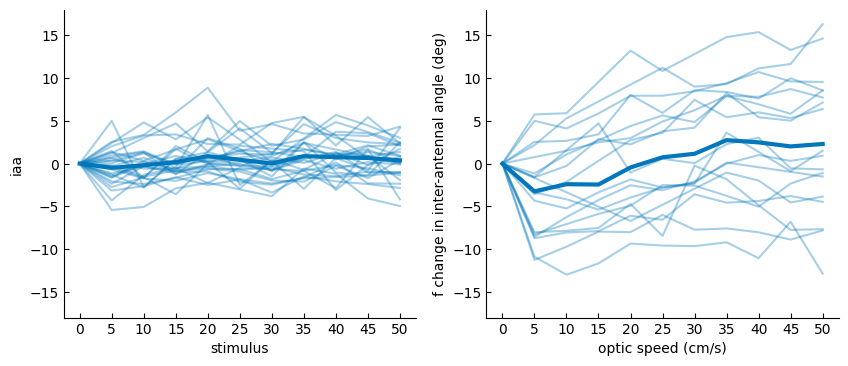

In [4]:
df_plot_list = []
zStim_df = df.loc[df['stimulus'] == 0, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()

fig, (ax2,ax) = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,units='fly',estimator=None,alpha=0.35)
sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='Flight_3rd',ax=ax1,color=const.orange)
#ax.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
ax.set_xlabel('optic speed (cm/s)')
ax.set_ylabel('f change in inter-antennal angle (deg)')
ax.set_ylim([-18, 18])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50])

#ax.xaxis.set_visible(False)

sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,units='fly',estimator=None,alpha=0.35)
sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='NoFlight_3rd',ax=ax2,color=const.orange)
#ax2.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')

#ax2.set_xlabel('optic speed (cm/s)')
#ax2.set_ylabel('nf change in inter-antennal angle (deg)')
ax2.set_ylim([-18, 18])
ax.set_xlabel('optic speed (cm/s)')
ax2.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
#ax2.xaxis.set_visible(False)
ax2.tick_params(direction="in")
ax2.spines[['right', 'top']].set_visible(False)
################################################
fig.savefig('5D_zero_baseline.pdf')
##################################
[print(stats.ttest_1samp(group[1]['iaa'].to_list(),0,nan_policy='omit')) for group in df_plot[df_plot['state'] == 'flight'].groupby(['stimulus'])]
print('----------------------------------------')
[print(stats.ttest_1samp(group[1]['iaa'].to_list(),0,nan_policy='omit')) for group in df_plot[df_plot['state'] == 'noFlight'].groupby(['stimulus'])]

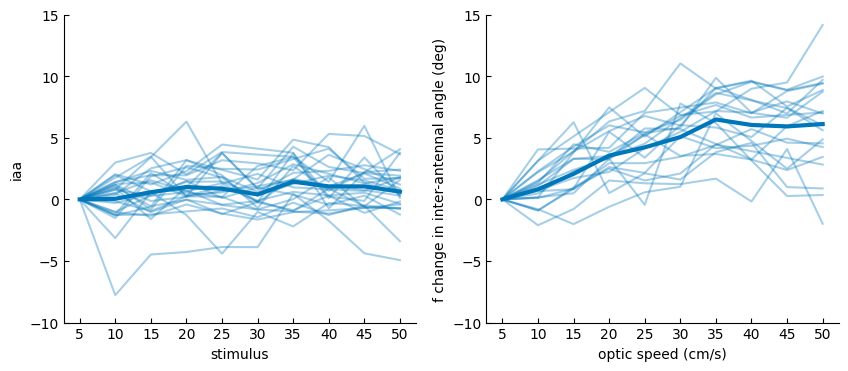

In [6]:
df_plot_list = []
zStim_df = df.loc[df['stimulus'] == 5, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()
df_plot = df_plot[df_plot['stimulus'] != 0]

fig, (ax2,ax) = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,units='fly',estimator=None,alpha=0.35)
sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='Flight_3rd',ax=ax1,color=const.orange)
#ax.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
ax.set_xlabel('optic speed (cm/s)')
ax.set_ylabel('f change in inter-antennal angle (deg)')
ax.set_ylim([-10, 15])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([5,10,15,20,25,30,35,40,45,50])

#ax.xaxis.set_visible(False)

sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,units='fly',estimator=None,alpha=0.35)
sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='NoFlight_3rd',ax=ax2,color=const.orange)
#ax2.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')

#ax2.set_xlabel('optic speed (cm/s)')
#ax2.set_ylabel('nf change in inter-antennal angle (deg)')
ax2.set_ylim([-10, 15])
ax.set_xlabel('optic speed (cm/s)')
ax2.set_xticks([5,10,15,20,25,30,35,40,45,50])
#ax2.xaxis.set_visible(False)
ax2.tick_params(direction="in")
ax2.spines[['right', 'top']].set_visible(False)
################################################
fig.savefig('5D.pdf')
##################################]

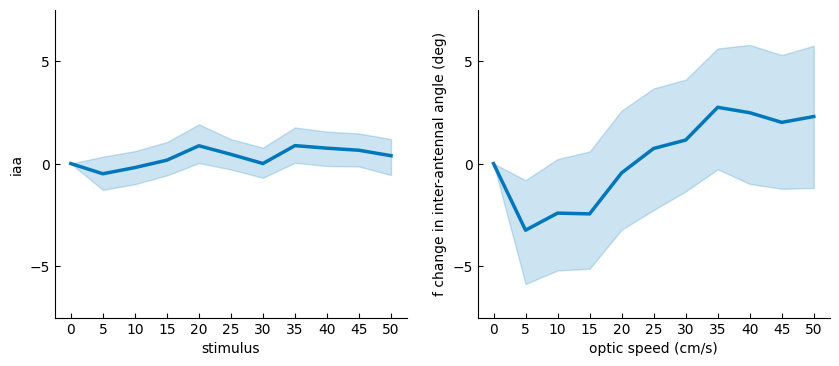

In [23]:

df_plot_list = []
zStim_df = df.loc[df['stimulus'] == 0, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()

fig, (ax2,ax) = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,lw=2.5)
#sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='Flight_3rd',ax=ax1,color=const.orange)
#ax.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
ax.set_xlabel('optic speed (cm/s)')
ax.set_ylabel('f change in inter-antennal angle (deg)')
ax.set_ylim([-7.5, 7.5])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax.set_yticks([-5,0,5])

#ax.xaxis.set_visible(False)

sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,lw=2.5)
#sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='NoFlight_3rd',ax=ax2,color=const.orange)
#ax2.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')

#ax2.set_xlabel('optic speed (cm/s)')
#ax2.set_ylabel('nf change in inter-antennal angle (deg)')
ax2.set_ylim([-7.5, 7.5])
ax.set_xlabel('optic speed (cm/s)')
ax2.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax2.set_yticks([-5,0,5])
#ax2.xaxis.set_visible(False)
ax2.tick_params(direction="in")
ax2.spines[['right', 'top']].set_visible(False)
################################################
fig.savefig('5D_errorbars.pdf')

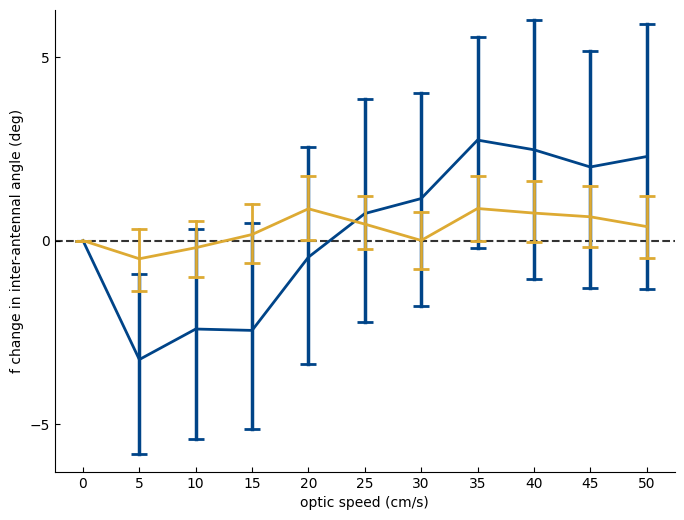

In [53]:
hcblue = np.array([0,68,136])/255
hcyellow = np.array([221,170,51])/255
hcred = np.array([187,85,102])/255
lgrey = np.array([221,221,221])/255
dgrey = np.array([102,102,102])/255
vcyan = np.array([51,187,238])/255
vred = np.array([204,51,17])/255
bcyan = np.array([102,204,238])/255
bred = np.array([238,102,119])/255
black = np.array([0,0,0])/255
df_plot_list = []
zStim_df = df.loc[df['stimulus'] == 0, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(0,ls='--',lw=1.5,c=black,alpha=0.8)

sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=hcblue,lw=2, err_style="bars",err_kws={'capsize':6,
                                                                                                                                   'elinewidth':2.5,
                                                                                                                                   'capthick':2})
#sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='Flight_3rd',ax=ax1,color=const.orange)
#ax.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
ax.set_xlabel('optic speed (cm/s)')
ax.set_ylabel('f change in inter-antennal angle (deg)')
ax.set_ylim([-6.3, 6.3])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax.set_yticks([-5,0,5])

#ax.xaxis.set_visible(False)

sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax,color=hcyellow,lw=2,err_style="bars",err_kws={'capsize':6,
                                                                                                                                     'elinewidth':2,
                                                                                                                                     'capthick':2})

#sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='NoFlight_3rd',ax=ax2,color=const.orange)
#ax2.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
"""
#ax2.set_xlabel('optic speed (cm/s)')
#ax2.set_ylabel('nf change in inter-antennal angle (deg)')
ax2.set_ylim([-7.5, 7.5])
ax.set_xlabel('optic speed (cm/s)')
ax2.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax2.set_yticks([-5,0,5])
#ax2.xaxis.set_visible(False)
ax2.tick_params(direction="in")
ax2.spines[['right', 'top']].set_visible(False)
"""
################################################
fig.savefig('5D_oneplot.pdf')

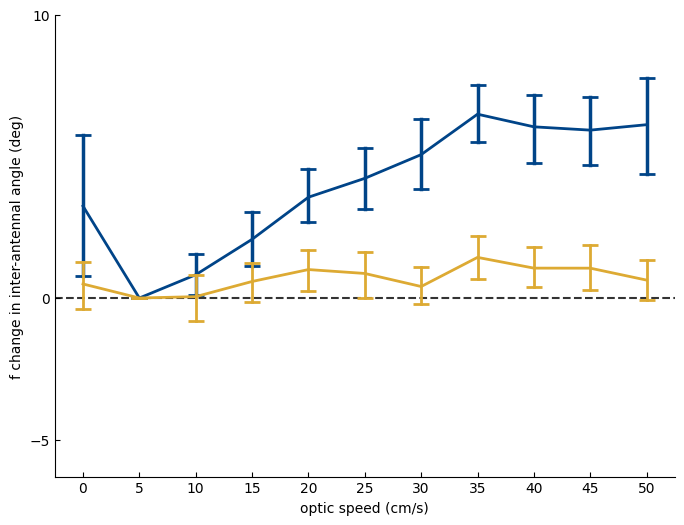

In [71]:
hcblue = np.array([0,68,136])/255
hcyellow = np.array([221,170,51])/255
hcred = np.array([187,85,102])/255
lgrey = np.array([221,221,221])/255
dgrey = np.array([102,102,102])/255
vcyan = np.array([51,187,238])/255
vred = np.array([204,51,17])/255
bcyan = np.array([102,204,238])/255
bred = np.array([238,102,119])/255
black = np.array([0,0,0])/255
df_plot_list = []
zStim_df = df.loc[df['stimulus'] == 5, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(0,ls='--',lw=1.5,c=black,alpha=0.8)

sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=hcblue,lw=2, err_style="bars",err_kws={'capsize':6,
                                                                                                                                   'elinewidth':2.5,
                                                                                                                                   'capthick':2})
#sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='Flight_3rd',ax=ax1,color=const.orange)
#ax.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
ax.set_xlabel('optic speed (cm/s)')
ax.set_ylabel('f change in inter-antennal angle (deg)')
ax.set_ylim([-6.3, 6.3])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax.set_yticks([-5,0,10])

#ax.xaxis.set_visible(False)

sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax,color=hcyellow,lw=2,err_style="bars",err_kws={'capsize':6,
                                                                                                                                     'elinewidth':2,
                                                                                                                                     'capthick':2})

#sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='NoFlight_3rd',ax=ax2,color=const.orange)
#ax2.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
"""
#ax2.set_xlabel('optic speed (cm/s)')
#ax2.set_ylabel('nf change in inter-antennal angle (deg)')
ax2.set_ylim([-7.5, 7.5])
ax.set_xlabel('optic speed (cm/s)')
ax2.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax2.set_yticks([-5,0,5])
#ax2.xaxis.set_visible(False)
ax2.tick_params(direction="in")
ax2.spines[['right', 'top']].set_visible(False)
"""
################################################
fig.savefig('5D_errorbar_5.pdf')

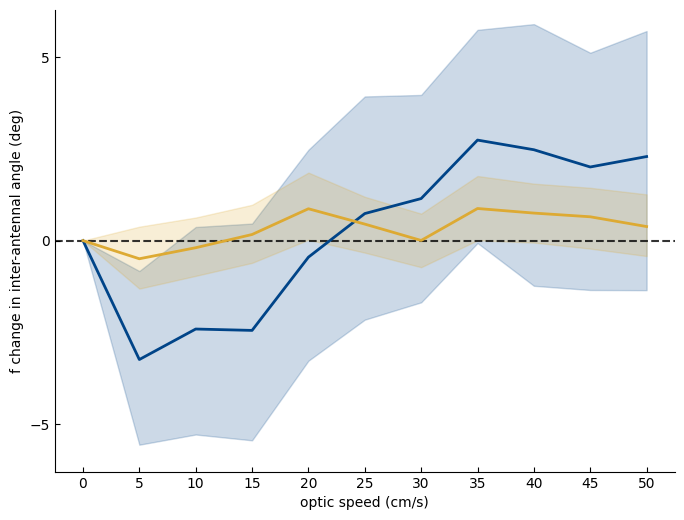

In [54]:
hcblue = np.array([0,68,136])/255
hcyellow = np.array([221,170,51])/255
hcred = np.array([187,85,102])/255
lgrey = np.array([221,221,221])/255
dgrey = np.array([102,102,102])/255
vcyan = np.array([51,187,238])/255
vred = np.array([204,51,17])/255
bcyan = np.array([102,204,238])/255
bred = np.array([238,102,119])/255
black = np.array([0,0,0])/255
df_plot_list = []
zStim_df = df.loc[df['stimulus'] == 0, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(0,ls='--',lw=1.5,c=black,alpha=0.8)

sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=hcblue,lw=2)
#sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='Flight_3rd',ax=ax1,color=const.orange)
#ax.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
ax.set_xlabel('optic speed (cm/s)')
ax.set_ylabel('f change in inter-antennal angle (deg)')
ax.set_ylim([-6.3, 6.3])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax.set_yticks([-5,0,5])

#ax.xaxis.set_visible(False)

sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax,color=hcyellow,lw=2)

#sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='NoFlight_3rd',ax=ax2,color=const.orange)
#ax2.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
"""
#ax2.set_xlabel('optic speed (cm/s)')
#ax2.set_ylabel('nf change in inter-antennal angle (deg)')
ax2.set_ylim([-7.5, 7.5])
ax.set_xlabel('optic speed (cm/s)')
ax2.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax2.set_yticks([-5,0,5])
#ax2.xaxis.set_visible(False)
ax2.tick_params(direction="in")
ax2.spines[['right', 'top']].set_visible(False)
"""
################################################
fig.savefig('5D_one_shaded.pdf')

Intercept                   0.165986
state[T.flight]            -0.373416
stimulus                    0.019570
stimulus:state[T.flight]    0.122665
Group Var                   0.754405
dtype: float64
Intercept                   0.356873
state[T.flight]             0.368559
stimulus                    0.007391
stimulus:state[T.flight]    0.011379
Group Var                   0.229492
dtype: float64
Intercept                    0.465113
state[T.flight]             -1.013179
stimulus                     2.647611
stimulus:state[T.flight]    10.779702
Group Var                    3.287279
dtype: float64
Intercept                   6.418508e-01
state[T.flight]             3.109749e-01
stimulus                    8.106265e-03
stimulus:state[T.flight]    4.292752e-27
Group Var                   1.011606e-03
dtype: float64
               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     iaa      
No. Observations:     441         Method:             

"\nospeeds = [10, 15, 20, 25, 30, 35, 40, 45, 50]\nnum_tests = len(ospeeds)\nfor stimulus in [10, 15, 20, 25, 30, 35, 40, 45, 50]:\n    flight = np.array(df_plot[(df_plot['state'] == 'flight') & (df_plot['stimulus'] == stimulus)]['iaa'].tolist())\n    flightB = flight > (-1 * np.inf)\n    noFlight = np.array(df_plot[(df_plot['state'] == 'noFlight') & (df_plot['stimulus'] == stimulus)]['iaa'].to_list())\n    noFlightB = noFlight > (-1 * np.inf)\n    combB = flightB * noFlightB\n    ans = stats.ttest_rel(noFlight[combB],flight[combB],nan_policy='omit')\n    print('optic speed = '+ str(stimulus))\n    print('t='+str(ans[0]) + ' p=' + str(num_tests * ans[1])+'\n')\n"

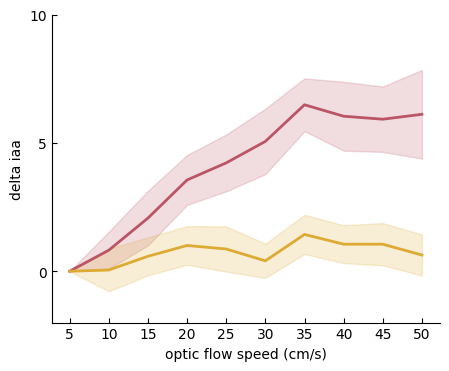

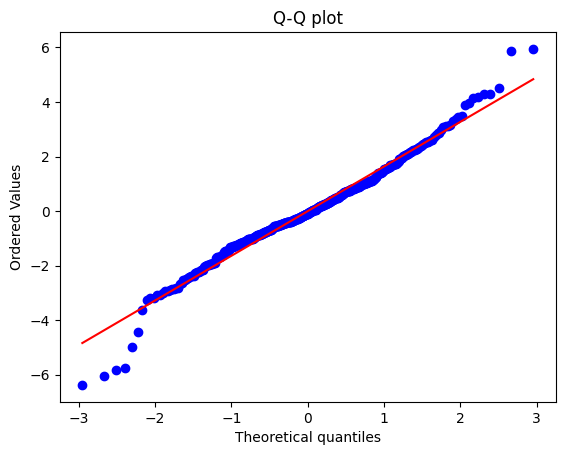

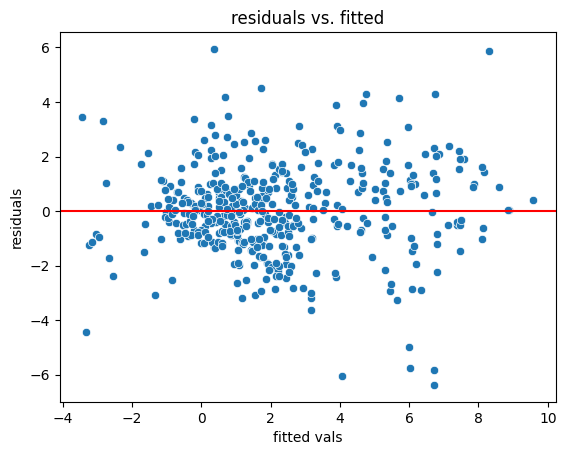

In [11]:
hcblue = np.array([0,68,136])/255
hcyellow = np.array([221,170,51])/255
hcred = np.array([187,85,102])/255
lgrey = np.array([221,221,221])/255
dgrey = np.array([102,102,102])/255
vcyan = np.array([51,187,238])/255
vred = np.array([204,51,17])/255
bcyan = np.array([102,204,238])/255
bred = np.array([238,102,119])/255
black = np.array([0,0,0])/255
df_plot_list = []
zStim_df = df.loc[df['stimulus'] == 5, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()
df_plot = df_plot[df_plot['stimulus'] !=0]
fig, ax = plt.subplots(figsize=(5,4))
#ax.axhline(0,ls='--',lw=1.5,c=black,alpha=0.8)

sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=hcred,lw=2,errorbar=('se',2))
#sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='Flight_3rd',ax=ax1,color=const.orange)
#ax.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
ax.set_xlabel('optic flow speed (cm/s)')
ax.set_ylabel('delta iaa')
ax.set_ylim([-2, 10])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([5,10,15,20,25,30,35,40,45,50])
ax.set_yticks([0,5, 10])

#ax.xaxis.set_visible(False)

sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax,color=hcyellow,lw=2,errorbar=('se',2))

#sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='NoFlight_3rd',ax=ax2,color=const.orange)
#ax2.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
"""
#ax2.set_xlabel('optic speed (cm/s)')
#ax2.set_ylabel('nf change in inter-antennal angle (deg)')
ax2.set_ylim([-7.5, 7.5])
ax.set_xlabel('optic speed (cm/s)')
ax2.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax2.set_yticks([-5,0,5])
#ax2.xaxis.set_visible(False)
ax2.tick_params(direction="in")
ax2.spines[['right', 'top']].set_visible(False)
"""
################################################
fig.savefig('5D_stats.pdf')
################################################

df_plot = df_plot.dropna()
#df_plot['subject_uid'] = df_final['index'].astype(str) + "_" + df_final['condition'].astype(str)
df_plot['stimulus'] = df_plot['stimulus'].astype(int)
df_plot['state'] = pd.Categorical(
    df_plot['state'],
    categories = ['noFlight', 'flight'],
    ordered=True)
    
model = smf.mixedlm("iaa ~ stimulus * state",
                    df_plot,
                    groups=df_plot["fly"])
                    #re_formula="~windspeed_num")

result = model.fit()
print(result.params)
print(result.bse)
print(result.tvalues)
print(result.pvalues)
print(result.summary())
b_intercept = result.params['Intercept']
b_wind = result.params['stimulus']
b_condition = result.params['state[T.flight]']
b_interaction = result.params['stimulus:state[T.flight]']

residuals = result.resid
fig_qq, ax_qq = plt.subplots()
stats.probplot(residuals, dist="norm",plot=ax_qq)
ax_qq.set_title('Q-Q plot')
fig_qq.savefig('qq_optic.pdf')
fitted = result.fittedvalues
fig_rvf, ax_rvf = plt.subplots()
sns.scatterplot(x=fitted,y=residuals,ax=ax_rvf)
ax_rvf.axhline(0,color='r')
ax_rvf.set_xlabel('fitted vals')
ax_rvf.set_ylabel('residuals')
ax_rvf.set_title('residuals vs. fitted')
fig_rvf.savefig('rvf_optic.pdf')


stimspeeds = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45,50])
"""
contrasts = b_condition + b_interaction * stimspeeds

cov = result.cov_params()
se = []
for os in stimspeeds:
    # delta method
    se_diff = np.sqrt(
        cov.loc['state[T.flight]', 'state[T.flight]'] +
        os**2 * cov.loc['stimulus:state[T.flight]', 'stimulus:state[T.flight]'] +
        2 * os * cov.loc['state[T.flight]', 'stimulus:state[T.flight]'])
    se.append(se_diff)

z_vals = contrasts / np.array(se)

p_vals = 2 * (1 - stats.norm.cdf(np.abs(z_vals)))
p_corr = statsmodels.stats.multitest.multipletests(p_vals[1:], method='holm')[1]
"""

t_vals_1samp_nf = [stats.ttest_1samp(group[1]['iaa'].to_list(),0,nan_policy='omit')[0] for group in df_plot[df_plot['state'] == 'noFlight'].groupby(['stimulus'])]
p_vals_1samp_nf = [stats.ttest_1samp(group[1]['iaa'].to_list(),0,nan_policy='omit')[1] for group in df_plot[df_plot['state'] == 'noFlight'].groupby(['stimulus'])]
p_vals_1samp_corr_nf = statsmodels.stats.multitest.multipletests(p_vals_1samp_nf[1:], method='holm')[1]

t_vals_1samp_f = [stats.ttest_1samp(group[1]['iaa'].to_list(),0,nan_policy='omit')[0] for group in df_plot[df_plot['state'] == 'flight'].groupby(['stimulus'])]
p_vals_1samp_f = [stats.ttest_1samp(group[1]['iaa'].to_list(),0,nan_policy='omit')[1] for group in df_plot[df_plot['state'] == 'flight'].groupby(['stimulus'])]
p_vals_1samp_corr_f = statsmodels.stats.multitest.multipletests(p_vals_1samp_f[1:], method='holm')[1]

results_df = pd.DataFrame({
    'stimulus': stimspeeds[1:],
    'p_nf': p_vals_1samp_nf[1:],
    'p_1samp_corr_nf': p_vals_1samp_corr_nf,
    'p_f': p_vals_1samp_f[1:],
    'p_1samp_corr_flight': p_vals_1samp_corr_f})

print(results_df.round(4))


"""
ospeeds = [10, 15, 20, 25, 30, 35, 40, 45, 50]
num_tests = len(ospeeds)
for stimulus in [10, 15, 20, 25, 30, 35, 40, 45, 50]:
    flight = np.array(df_plot[(df_plot['state'] == 'flight') & (df_plot['stimulus'] == stimulus)]['iaa'].tolist())
    flightB = flight > (-1 * np.inf)
    noFlight = np.array(df_plot[(df_plot['state'] == 'noFlight') & (df_plot['stimulus'] == stimulus)]['iaa'].to_list())
    noFlightB = noFlight > (-1 * np.inf)
    combB = flightB * noFlightB
    ans = stats.ttest_rel(noFlight[combB],flight[combB],nan_policy='omit')
    print('optic speed = '+ str(stimulus))
    print('t='+str(ans[0]) + ' p=' + str(num_tests * ans[1])+'\n')
"""

## Fig S4B

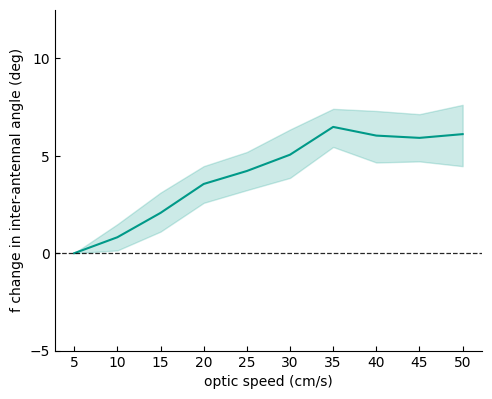

In [8]:
vteal = np.array([0,153,136])/255
df_plot_list = []
zStim_df = df.loc[df['stimulus'] == 5, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0) - np.nanmean(zStim_df.loc[zStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()
df_plot = df_plot[df_plot['stimulus'] != 0]

fig, ax = plt.subplots(1,1,figsize=(5,4))
fig.tight_layout()
sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=vteal)
#sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)
#sns.lineplot(data=df_plot, x='stimulus',y='Flight_3rd',ax=ax1,color=const.orange)
#ax.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')
ax.set_xlabel('optic speed (cm/s)')
ax.set_ylabel('f change in inter-antennal angle (deg)')
ax.set_ylim([-5, 12.5])
ax.set_yticks([-5,0,5,10])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([5,10,15,20,25,30,35,40,45,50])
ax.axhline(0,c='k',ls='--',lw=0.9,alpha=0.85)

#sns.lineplot(data=df_plot, x='stimulus',y='NoFlight_3rd',ax=ax2,color=const.orange)
#ax2.legend(['2nd Segment', '_', '3rd Segment', '_'],frameon=False,loc='lower right')

ax.set_xlabel('optic speed (cm/s)')
################################################
fig.savefig('S4B.pdf')

## Fig 5C

Flight
TtestResult(statistic=2.475302981320096, pvalue=0.024878669987432954, df=16)
----------------------------------------
no Flight
TtestResult(statistic=1.1408185268832172, pvalue=0.26475653654900033, df=25)


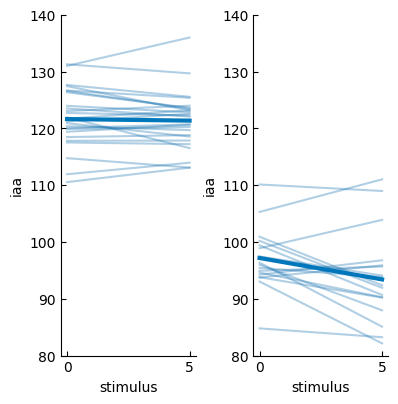

In [9]:
df_plot_list = []
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = []
    subStim_df = df.loc[df['stimulus'] == stim, ['fly', 'StimAvg_Flight','StimAvg_noFlight','stimulus']]
    fly_Flight = []
    fly_NoFlight = []
    flight_df_plot = pd.DataFrame()
    noFlight_df_plot = pd.DataFrame()
    for fly in range(el.num_experiments):
        fly_Flight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_Flight'].tolist(), axis=0))
        fly_NoFlight.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'StimAvg_noFlight'].tolist(), axis=0))
    
    flight_df_plot['iaa'] = list(np.array(fly_Flight)[:,0])
    noFlight_df_plot['iaa'] = list(np.array(fly_NoFlight)[:,0])
    #sub_df_plot['Flight_3rd'] = list(np.array(fly_Flight)[:,1])
    #sub_df_plot['NoFlight_3rd'] = list(np.array(fly_NoFlight)[:,1])
    flight_df_plot['fly'] = list(range(30))
    noFlight_df_plot['fly'] = list(range(30))
    flight_df_plot['stimulus'] = stim
    noFlight_df_plot['stimulus'] = stim
    flight_df_plot['state'] = 'flight'
    noFlight_df_plot['state'] = 'noFlight'
    sub_df_plot.append(flight_df_plot)
    sub_df_plot.append(noFlight_df_plot)
    df_plot_list.append(pd.concat(sub_df_plot).reset_index(drop=True))

df_plot = pd.concat(df_plot_list).reset_index()

df_plot = df_plot[df_plot['stimulus'].isin([0,5])]
#df_plot['dir'] = [((fly[fly['stimulus'] == 0]['iaa']).to_numpy() > (fly[fly['stimulus'] == 5]['iaa']).to_numpy()) for _,fly in df_plot.groupby(['fly'])]

fig, (ax2,ax) = plt.subplots(1,2,figsize=(4,4))
fig.tight_layout()
sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,markers=True,units='fly',estimator=None,alpha=0.35)
sns.lineplot(data=df_plot[df_plot['state'] == 'flight'], x='stimulus',y='iaa',ax=ax,color=const.blue,errorbar=None,lw=3)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction="in")
ax.set_xticks([0,5])
ax.set_ylim([80,140])

sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,units='fly',estimator=None,alpha=0.35)
sns.lineplot(data=df_plot[df_plot['state'] == 'noFlight'], x='stimulus',y='iaa',ax=ax2,color=const.blue,errorbar=None,lw=3)

ax2.set_xticks([0,5])
ax2.set_ylim([80,140])
ax2.tick_params(direction="in")
ax2.spines[['right', 'top']].set_visible(False)

################################################
fig.savefig('5C.pdf')
##################################
print('Flight')
flight_0 = df_plot[(df_plot['state'] == 'flight') & (df_plot['stimulus'] == 0)]['iaa'].to_list()
flight_5 = df_plot[(df_plot['state'] == 'flight') & (df_plot['stimulus'] == 5)]['iaa'].to_list()
print(stats.ttest_rel(flight_0,flight_5,nan_policy='omit'))
print('----------------------------------------')
print('no Flight')
noFlight_0 = df_plot[(df_plot['state'] == 'noFlight') & (df_plot['stimulus'] == 0)]['iaa']
noFlight_5 = df_plot[(df_plot['state'] == 'noFlight') & (df_plot['stimulus'] == 5)]['iaa']
print(stats.ttest_rel(noFlight_0,noFlight_5,nan_policy='omit'))

## Fig 5E and 5F

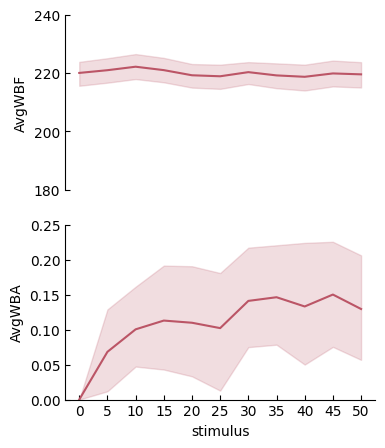

In [10]:
fig, (ax3,ax4) = plt.subplots(2,1,figsize=(4,5))
df_plot_list = []
for stim in const.stimNamesInMat[:-1]:
    sub_df_plot = pd.DataFrame()
    subStim_df = fl_df.loc[fl_df['stimulus'] == stim, ['fly', 'Avg_wbf','Avg_wba','stimulus']]
    zeroStim_df = fl_df.loc[fl_df['stimulus'] == 0, ['fly', 'Avg_wbf','Avg_wba','stimulus']]
    #zeroStim_df = fl_df.loc[fl_df['stimulus'] == '0', ['fly', 'Avg_wbf','Avg_wba','stimulus']]
    flyAvgWBF = []
    flyAvgWBA = []
    for fly in range(el.num_experiments):
        flyAvgWBF.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'Avg_wbf']))
        flyAvgWBA.append(np.nanmean(subStim_df.loc[subStim_df['fly'] == fly, 'Avg_wba']) - np.nanmean(zeroStim_df.loc[zeroStim_df['fly'] == fly, 'Avg_wba']))
    sub_df_plot['AvgWBF'] = flyAvgWBF
    sub_df_plot['AvgWBA'] = flyAvgWBA
    sub_df_plot['fly'] = list(range(30))
    sub_df_plot['stimulus'] = stim
    df_plot_list.append(sub_df_plot)


df_plot = pd.concat(df_plot_list).reset_index()
for fly in range(el.num_experiments):
    fly_max = np.nanmax(df_plot.loc[df_plot['fly'] == fly, 'AvgWBA'].to_numpy())
    fly_min = np.nanmin(df_plot.loc[df_plot['fly'] == fly, 'AvgWBA'].to_numpy())
    fly_vals = list(df_plot.loc[df_plot['fly'] == fly, 'AvgWBA'].to_numpy() * -1)
    df_plot.loc[df_plot['fly'] == fly, 'AvgWBA'] = fly_vals

sns.lineplot(x='stimulus',y='AvgWBF', data=df_plot, ax=ax3,color=const.HCred)
ax3.spines[['right', 'top','bottom']].set_visible(False)
ax3.xaxis.set_visible(False)
ax3.tick_params(direction="in")
ax3.set_yticks([180,200,220,240])
ax3.set_ylim([180,240])

sns.lineplot(x='stimulus',y='AvgWBA', data=df_plot, ax=ax4,color=const.HCred)
ax4.spines[['right', 'top']].set_visible(False)
ax4.set_xticks([0,5,10,15,20,25,30,35,40,45,50])
ax4.set_yticks([0.0,0.05,0.1,0.15,0.2,0.25])
ax4.set_ylim([0,0.25])
ax4.tick_params(direction="in")

fig.savefig(const.savedFigureDirectory+'5EF'+'.png',format='png')
fig.savefig(const.savedFigureDirectory+'5EF'+'.pdf',format='pdf')

## Miscellaneous

In [6]:
i = 58
traces = df_new['iaa'][i]
stimEnd = const.stimStart + const.stimLen

In [7]:
if const.FLIGHT:
    flightBool = df_new['flightBool'][i]
    if const.PUFFER:
        pufferSignal = df_new[const.puffer_signal_name][i]

In [60]:
flightBool[:] = False

In [8]:
if const.FLIGHT == True and const.BASELINE == False:
                catgs = ['StimAvg_Flight', 'StimAvg_noFlighta']
                df_new[catgs[0]] = pd.Series(dtype='object')
                df_new[catgs[1]] = pd.Series(dtype='object')


In [20]:
np.tile(np.nan,np.shape(df.reset_index()['iaa'][1])[1])

array([nan, nan])

In [10]:
if np.all(flightBool): #full flight
    df_new[catgs[0]][i] = np.mean(traces[const.stimStart*const.fps:stimEnd*const.fps,:], axis=0)
    df_new[catgs[1]][i] = np.nan
elif np.all(flightBool == False): #full no flight
    df_new[catgs[1]][i] = np.mean(traces[const.stimStart*const.fps:stimEnd*const.fps,:], axis=0)
    df_new[catgs[0]][i] = np.nan

In [40]:
np.all(flightBool)

True

In [44]:
np.mean(traces[const.stimStart*const.fps:stimEnd*const.fps,:], axis=0)

array([106.49722222, 125.16444444])

In [20]:
angles = adc.get_antenna_angles(expt = '2024_05_23_E4')
new_angs = []
for antennalAvgIDXs in const.angPairAverageSets['dorsal']:
    new_angs.append(np.mean(np.transpose([angles[:,i] for i in antennalAvgIDXs]),axis=1))
np.transpose(np.array(new_angs))

array([[72.95, 65.5 ],
       [72.65, 65.5 ],
       [72.1 , 66.1 ],
       [71.45, 65.35],
       [71.4 , 65.65],
       [72.6 , 65.55],
       [72.15, 64.75],
       [71.7 , 65.05],
       [71.4 , 65.45],
       [71.5 , 66.15],
       [71.4 , 65.6 ],
       [71.5 , 65.6 ],
       [71.1 , 65.6 ],
       [71.3 , 65.45],
       [71.5 , 65.6 ],
       [71.4 , 65.45],
       [71.5 , 65.45],
       [71.1 , 65.6 ],
       [71.5 , 65.6 ],
       [71.3 , 65.5 ],
       [71.3 , 65.85],
       [70.95, 65.45],
       [71.5 , 65.7 ],
       [71.5 , 65.25],
       [71.3 , 65.45],
       [70.7 , 65.35],
       [71.3 , 65.5 ],
       [72.  , 65.45],
       [71.6 , 65.6 ],
       [71.3 , 65.7 ],
       [70.85, 66.15],
       [71.3 , 65.55],
       [71.85, 66.05],
       [71.1 , 66.1 ],
       [71.6 , 66.2 ],
       [71.5 , 66.05],
       [71.2 , 66.2 ],
       [71.85, 66.15],
       [71.4 , 65.45],
       [71.95, 66.2 ],
       [71.3 , 66.2 ],
       [70.95, 66.15],
       [71.3 , 66.  ],
       [71.

In [5]:
np.shape(angles)

(480, 4)

In [15]:
np.shape(new_angles)

(480,)

In [19]:
np.shape(np.array(new_angs))

(2, 480)

In [20]:
df['StimAvg_Flight'].to_list()[112]

array([100.71083333, 124.57944444])

(12, 100)

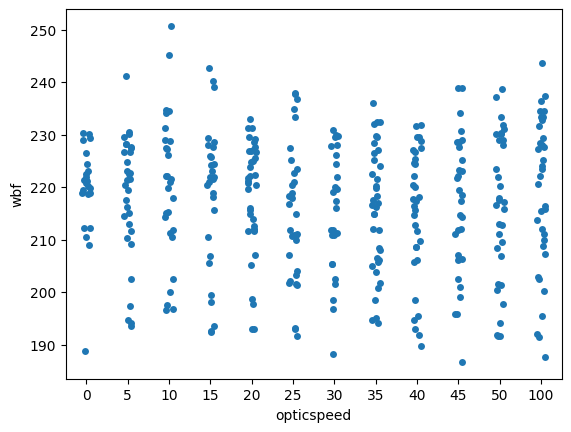

In [36]:
wbfArr = np.array([df.query('stimulus==@i')['wbf'].tolist() for i in const.stimNamesInMat])
wbfArr = np.where(wbfArr==0,np.nan,wbfArr)
newArr = np.nanmean(wbfArr[:,:,const.stimStart*const.fs:const.stimEnd*const.fs],axis=2)
fullFlightArr = np.all((np.array([df.query('stimulus==@i')['flightBool'].tolist() for i in const.stimNamesInMat])),axis=2)
newArr = np.multiply(newArr, fullFlightArr)
newArr = np.where(newArr==0,np.nan,newArr)
df_plot = pd.DataFrame()
for i, col in enumerate(const.stimNames):
    df_plot[col] = newArr[i, :]
df_fin = pd.melt(df_plot,var_name='opticspeed',value_name='wbf')
sns.stripplot(data=df_fin,x='opticspeed',y='wbf')

In [29]:
wbaArr = np.array([df.query('stimulus==@i')['wba'].tolist() for i in const.stimNamesInMat])
wbaArr = np.where(wbaArr==0,np.nan,wbaArr)
newArr = np.nanmean(wbfArr[:,:,const.stimStart*const.fs:const.stimEnd*const.fs],axis=2)
fullFlightArr = np.all((np.array([df.query('stimulus==@i')['flightBool'].tolist() for i in const.stimNamesInMat])),axis=2)
newArr = np.multiply(newArr, fullFlightArr)
newArr = np.where(newArr==0,np.nan,newArr)
df_plot = pd.DataFrame()
for i, col in enumerate(const.stimNames):
    df_plot[col] = newArr[i, :]
df_fin = pd.melt(df_plot,var_name='opticspeed',value_name='wba')
sns.stripplot(data=df_fin,x='opticspeed',y='wba')

In [30]:
fullFlightArr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [51]:
tchylist = df['tachometerSignal'].to_list()

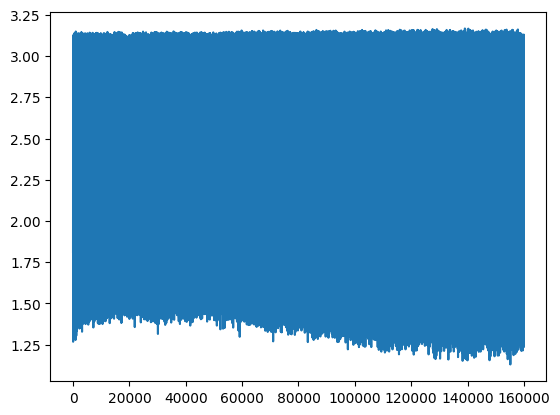

In [59]:
plt.plot(tchylist[100])

In [74]:
_,IF,IA = emd.spectra.frequency_transform(tchylist[100],50000,'hilbert')

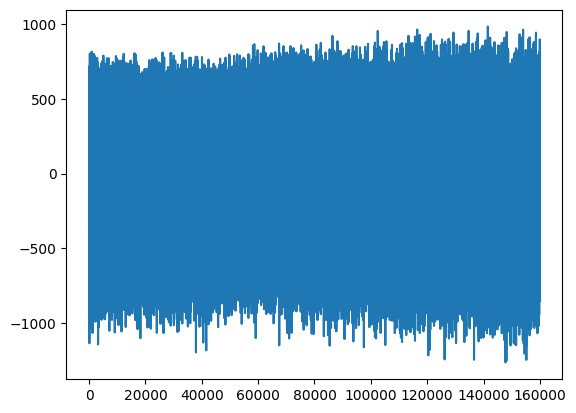

In [75]:
plt.plot(IF)

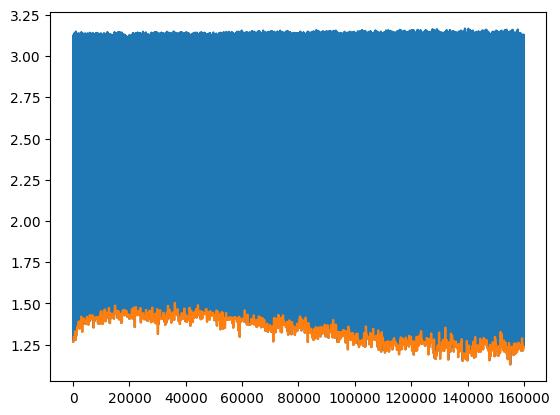

In [159]:
fig, ax = plt.subplots()
ax.plot(tchylist[100])
ax.plot(new)

In [81]:
20000/100

200.0

In [87]:
tch = tchylist[100]

In [146]:
new = np.zeros((160000,1))

In [158]:
sample_win = int(const.fs/100)
for i in range(0,const.fs*const.lenVideo,sample_win):
    new[i:i+sample_win] = np.min(tch[i:i+sample_win])
    

In [149]:
new

array([[1.2677911 ],
       [1.2677911 ],
       [1.2677911 ],
       ...,
       [1.23556396],
       [1.23556396],
       [0.        ]])

In [102]:
np.shape(new)

(160000, 1)

In [107]:
new[0:199] = np.min(tch[1:199])

In [131]:
_,_, IA = emd.spectra.frequency_transform(tch,100,'hilbert')

In [109]:
range(800)

range(0, 800)

In [117]:
df

,date,expnumber,condition,min_age,max_age,samplerate,adjust_time,record_time,fps,nframes,...,fly,tachometerSignal_smoothed,flightBool,wbf,wba,L_antenna,R_antenna,iaa,StimAvg_Flight,StimAvg_noFlight
0,"[b'', b'MCOS', b'string', [[3707764736], [2], ...",[1],still,[3],[6],[20000],[2],[6],[60],[480],...,0,"[0.41765423457752704, 0.4386401572116376, 0.45...","[True, True, True, True, True, True, True, Tru...","[57.815488343796446, 57.8793585851861, 57.9432...","[2.677487180710847, 2.677487180710847, 2.67748...","[[50.7, 61.1], [50.0, 60.4], [51.8, 62.3], [54...","[[58.6, 71.2], [56.7, 68.9], [60.0, 72.7], [61...","[[109.30000000000001, 132.3], [106.7, 129.3], ...","[nan, nan]","[nan, nan]"
1,"[b'', b'MCOS', b'string', [[3707764736], [2], ...",[1],still,[3],[6],[20000],[2],[6],[60],[480],...,0,"[9.094871374662396e-05, -2.9006813464867406e-0...","[False, False, False, False, False, False, Fal...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[56.8, 70.0], [56.8, 68.4], [56.8, 67.2], [56...","[[61.9, 75.4], [62.5, 75.4], [62.1, 75.4], [62...","[[118.69999999999999, 145.4], [119.3, 143.8], ...","[nan, nan]","[118.81777777777776, 146.221111111111]"
2,"[b'', b'MCOS', b'string', [[3707764736], [2], ...",[1],still,[3],[6],[20000],[2],[6],[60],[480],...,0,"[0.002005236374420267, 0.002183780615457405, 0...","[False, False, False, False, False, False, Fal...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[58.4, 70.0], [58.1, 68.7], [58.8, 69.2], [58...","[[64.4, 74.7], [63.8, 75.9], [64.0, 74.7], [64...","[[122.80000000000001, 144.7], [121.9, 144.6000...","[nan, nan]","[122.2141666666666, 141.65750000000008]"
3,"[b'', b'MCOS', b'string', [[3707764736], [2], ...",[1],still,[3],[6],[20000],[2],[6],[60],[480],...,0,"[-2.2221325592274482e-05, -0.00014401465857653...","[False, False, False, False, False, False, Fal...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[59.3, 69.5], [59.8, 66.5], [59.3, 67.0], [58...","[[64.0, 74.4], [63.8, 74.4], [63.4, 74.4], [64...","[[123.3, 143.9], [123.6, 140.9], [122.69999999...","[nan, nan]","[120.61583333333341, 144.93972222222226]"
4,"[b'', b'MCOS', b'string', [[3707764736], [2], ...",[1],still,[3],[6],[20000],[2],[6],[60],[480],...,0,"[-0.009444311612932339, -0.009338469599132383,...","[False, False, False, False, False, False, Fal...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[59.1, 70.8], [59.1, 69.2], [59.8, 67.5], [58...","[[64.0, 75.9], [64.4, 75.9], [64.0, 76.3], [64...","[[123.1, 146.7], [123.5, 145.10000000000002], ...","[nan, nan]","[nan, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,"[b'', b'MCOS', b'string', [[3707764736], [2], ...",[5],still,[5],[7],[20000],[2],[6],[60],[480],...,19,"[-0.001728721055837682, -0.0018593829735567443...","[False, False, False, False, False, False, Fal...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[54.9, 62.1], [54.9, 61.2], [53.9, 61.2], [55...","[[85.1, 75.3], [84.0, 76.3], [84.1, 75.3], [83...","[[140.0, 137.4], [138.9, 137.5], [138.0, 136.5...","[nan, nan]","[136.52888888888884, 134.74472222222224]"
56,"[b'', b'MCOS', b'string', [[3707764736], [2], ...",[5],still,[5],[7],[20000],[2],[6],[60],[480],...,19,"[-9.154048402663445e-05, -0.000260428166363987...","[False, False, False, False, False, False, Fal...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[55.2, 65.5], [57.3, 65.9], [56.4, 64.1], [57...","[[86.0, 77.9], [86.0, 77.8], [85.9, 78.2], [86...","[[141.2, 143.4], [143.3, 143.7], [142.3, 142.3...","[nan, nan]","[135.15222222222218, 136.9069444444445]"
57,"[b'', b'MCOS', b'string', [[3707764736], [2], ...",[5],still,[5],[7],[20000],[2],[6],[60],[480]

In [118]:
new

array([[1.2677911],
       [1.2677911],
       [1.2677911],
       ...,
       [0.       ],
       [0.       ],
       [0.       ]])